## Check CA1 tetrodes data

- Plots data given chunk
- Stores a snipped of data if allowed

In [4]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from ephys_utils import *
from scipy.ndimage import gaussian_filter1d
from tqdm.auto import tqdm
import warnings
from scipy.signal import butter
from scipy.signal import filtfilt

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

#### Variables definition

In [14]:
path ='E:/EPHYS/data/NAPOLEAO_DNMP22_18_trials_20180504094832'
tts=[1, 14,16, 18, 19] # Check ephys_planning file
rate=3000 #Homero:2000, for others: 3000
chunk_nr = 16

#### Plot raw data from CA1 tetrodes in tts list

1
14
16
18
19


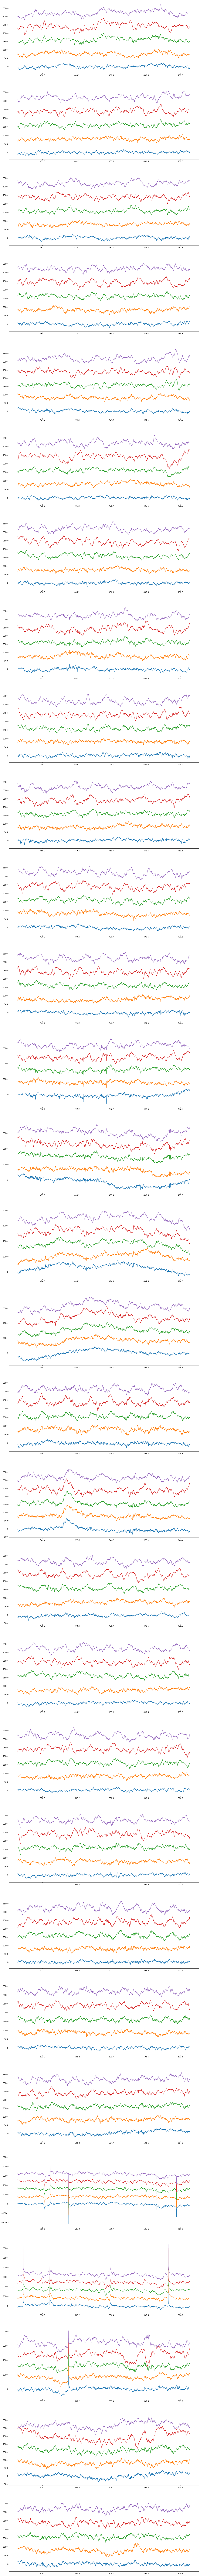

In [15]:
i=0
fig, axs = plt.subplots(30, 1,figsize=(18,250))

# Open ephys timestamp
stamp_path = os.path.join(path, 'Ephys_timestamps')
stamp_files = get_file_list(stamp_path, "*.csv")
stamp_file = [f for f in stamp_files if 'chunk{}'.format(chunk_nr) in f][0]
timestamps = pd.read_csv(os.path.join(stamp_path, stamp_file)) 

for tt in tts:
    print(tt)
    # Get file and data
    tt_path = os.path.join(path, 'TT{}'.format(tt))
    ephys_files = get_file_list(tt_path, "*.csv")   
    chunk_file = [f for f in ephys_files if 'chunk{}'.format(chunk_nr) in f][0]
    chunk = pd.read_csv(os.path.join(tt_path, chunk_file))
    
    #Add timestamps
    chunk['t'] = timestamps.loc[:,'0']
    
    # Plot data in subplots
    start=0
    end=3000 #each plot will have xx samples (yy secs)
    
    for nr in range(30):

        if nr==29:
            end=len(chunk)

        x=range(start,end)
        axs[nr].plot(chunk['t'].iloc[x], chunk.iloc[x, 2] + i, linewidth=1)
        sns.despine()
        start+=3000
        end+=3000
        
    i+=800

In [16]:
data={}

for tt in tts:
    
     # Get file and data
    tt_path = os.path.join(path, 'TT{}'.format(tt))
    ephys_files = get_file_list(tt_path, "*.csv")   
    chunk_file = [f for f in ephys_files if 'chunk{}'.format(chunk_nr) in f][0]
    chunk = pd.read_csv(os.path.join(tt_path, chunk_file))
    
    data[tt]=chunk.iloc[:,1] #just one channel per tt (with tts in CG and HIPP)

In [13]:
data2= pd.concat(data, axis=1)

In [72]:
data2['avg']=np.mean(data2, axis=1)

<IPython.core.display.Javascript object>


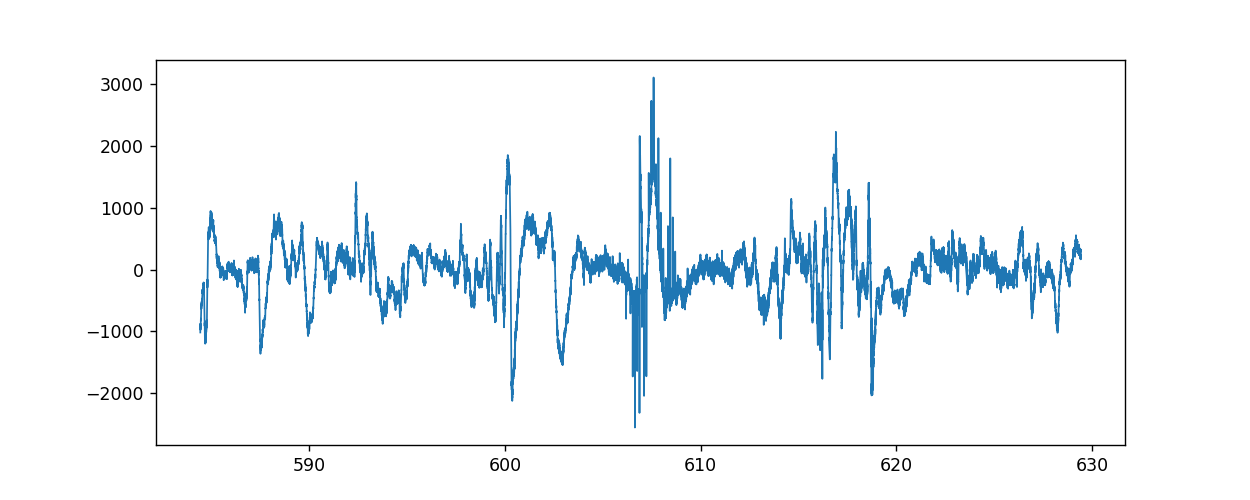

In [74]:
%matplotlib notebook
plt.rcParams['animation.html']='jshtml'
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(timestamps.loc[:,'0'], data2['avg'], linewidth=1)
plt.show()

In [32]:
np.mean(data[10], data[14], data[17], data[20], data[25])

ValueError: the 'dtype' parameter is not supported in the pandas implementation of mean()

#### Save snippet

In [ ]:
#sinppet = 
pd.to_csv()